In [44]:
%matplotlib inline
%run 'bin/notebook_utils.py'


In [47]:
prof_csv = '../rawdata/profiler_overhead/profiler_data.csv'

all_df = pd.read_csv(prof_csv)
# print all_df

plain_df = all_df.loc[all_df['cfg'] == 5]
prof_df  = all_df.loc[all_df['cfg'] == 6]

prof_list  = prof_df['ttc'].values
plain_list = plain_df['ttc'].values

prof_sigma  = np.sqrt(np.var(prof_list))
plain_sigma = np.sqrt(np.var(plain_list))

prof_mean   = np.mean(prof_list)
plain_mean  = np.mean(plain_list)

print 'plain   : %7.1f += %5.1f' % (plain_mean, plain_sigma)
print 'profiled: %7.1f += %5.1f' % (prof_mean, prof_sigma)


plain   :  1045.5 +=  29.4
profiled:  1069.2 +=  49.5


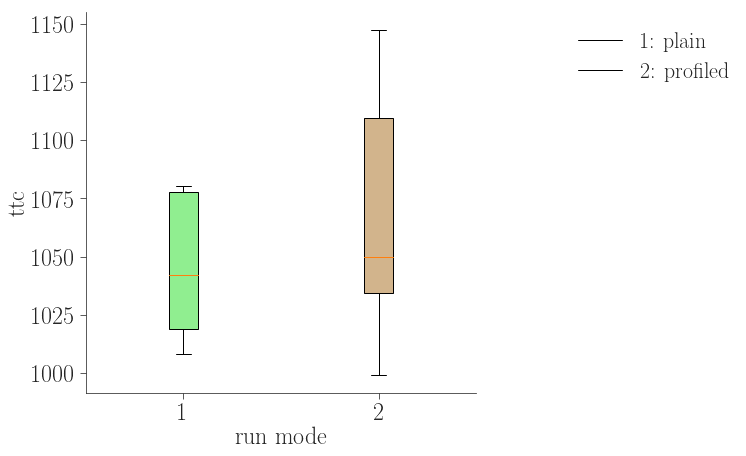

In [50]:

# plot time spent in
#  - reading the unit's resource requiremeents
#  - finding suitable resources
#  - recording the findings (in the schedule data structure and in the unit)


fig, ax  = fig_setup(figsize=(7,7))
ssize    = 4096

box = plt.boxplot([plain_df['ttc'].values, prof_df['ttc'].values], patch_artist=True)

colors = ['lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set(facecolor=color)       

    
plt.legend(loc='upper right', bbox_to_anchor=(1.7,1), labels=['1: plain', '2: profiled'])
plt.xlabel('run mode')
plt.ylabel('ttc')

plt.savefig('figures/paper_titan_rp_profiler_overhead.pdf', dpi=300, bbox_inches='tight')

In [ ]:
alpha=0.5